In [204]:
import numpy as np
#import numba
#from numba import jit
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import brentq
from RungeKutta2simple import *

m       = 5e9                # Mass (kg)
g       = 9.81               # Gravity acceleration (m.s-2)
Dc      = 1e-6               # Critical slip distance (m)
b       = 0.01               # Rate and State b value
a       = 0.0075             # Rate and state a value
k       = 5e-1*(m*g)*(b-a)/Dc # Spring stiffness (Pa) taken to be 0.1*kcrit as defined in Seagall 2010
print(k*m*g,(b-a)/Dc,m*g*(b-a)/Dc)
Shear   = 30e9               # Shear modulus (Pa)
Vs      = 3000               # Shear wave velocity (m.s-1)
eta     = Shear/2/Vs         # Radiation damping factor (Pa.s.m-1)

Vplate  = 2               # Plate velocity (m.s-1)
V0      = Vplate             # Arbitrary Normalizing Velocity (m.s-1)

f0      = 0.6  # Static friction coefficient
sigma0  = m*g  # Normalizing Force 

Theta0  = 1
v0      = 2


#alpha = np.deg2rad(10)


#@jit(nopython=True)
def Vpt(TauPt, ThetaPt, Theta, v):
    return (TauPt/sigma0-b*ThetaPt/Theta)/(eta/sigma0+a/v)

#@jit(nopython=True)
def Thetapt(Theta, v):
    return 1-Theta*v/Dc

#@jit(nopython=True)
def Taupt(v):
    return k*(Vplate-v)

n_iterations = 200000

Thetaptlist=np.empty((n_iterations+1,1)) 
#Thetaptlist[0]=[Thetapt0]
Thetalist=np.empty((n_iterations+1,1))
Thetalist[0]= [Theta0]

Taulist=np.empty((n_iterations+1,1)) 
#Taulist[0]=[Tau]
Tauptlist=np.empty((n_iterations+1,1))
#Tauptlist[0]= [Taupt]

ulist=np.empty((n_iterations+1,1))
ulist[0] = [0]
vlist=np.empty((n_iterations+1,1))
vlist[0] = [v0]
vptlist=np.empty((n_iterations+1,1))
#vptlist[0] = [0]

t=np.empty((n_iterations+1,1))
t[0] = [0]

for i in range(1, n_iterations):

    #print(1e-9*Dc/(V0*np.exp(Philist[-1])))
    Delta_t = 1e-2*Dc/np.abs(vlist[i-1])

    #1) Determine Taupt and Thetapt
    Taupt_n0, Thetapt_n0 = Taupt(vlist[i-1]), Thetapt(Thetalist[i-1],vlist[i-1])
    #2) Determine vpt
    vpt_n0 = Vpt(Taupt_n0,Thetapt_n0,Thetalist[i-1],vlist[i-1])
    #3) Store these values
    Tauptlist[i-1],Thetaptlist[i-1],vptlist[i-1] = Taupt_n0, Thetapt_n0, vpt_n0
    #4)Determine v and Theta at the next step with a forward scheme
    Thetalist[i],vlist[i]=Thetalist[i-1]+Delta_t*Thetaptlist[i-1],vlist[i-1]+Delta_t*vptlist[i-1]
    #5) Likewise, determine next position and stress, store time
    t[i],Taulist[i],ulist[i]=t[i-1]+Delta_t,Thetalist[i-1]+Delta_t*Thetaptlist[i-1],ulist[i-1]+Delta_t*vlist[i-1]
    #print(Taupt_n0,Taulist[i],ulist[i],Thetapt_n0,t[i],Thetalist[i])

3.0073781250000007e+26 250000.00000000003 1.2262500000000002e+16


Text(0, 0.5, 'Friction')

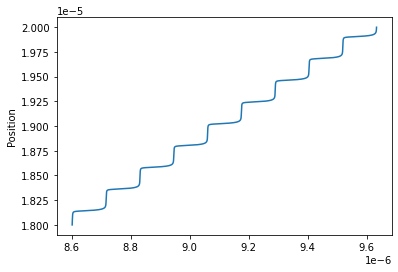

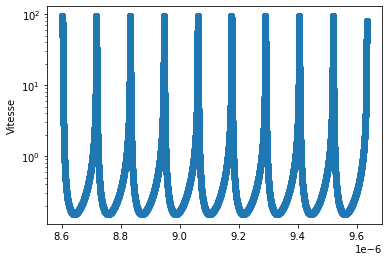

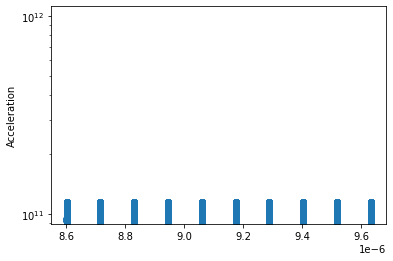

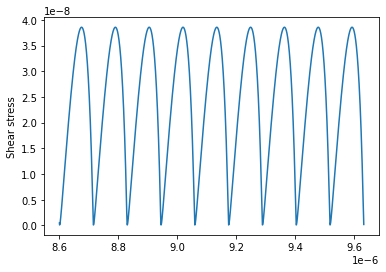

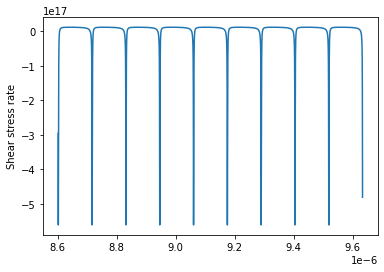

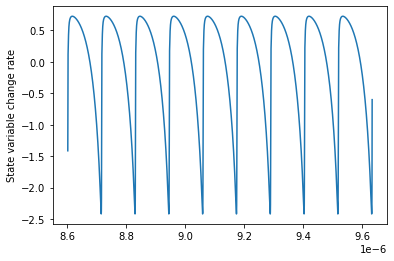

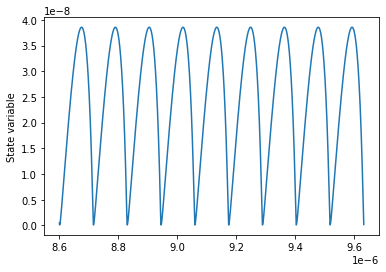

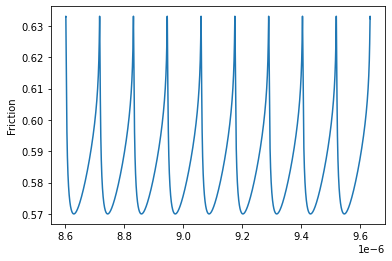

In [205]:
plotspeed=1
plotstart=int(9*n_iterations/10)
plotend=n_iterations-2
plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(ulist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Position')  
#plt.yscale('log')

plt.figure()
plt.scatter(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(vlist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Vitesse')
plt.yscale('log')

plt.figure()
plt.scatter(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(vptlist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Acceleration')
plt.yscale('log')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Taulist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Shear stress')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Tauptlist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Shear stress rate')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Thetaptlist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('State variable change rate')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Thetalist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('State variable')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(f0+a*np.log(vlist[i]/v0)+b*np.log(Thetalist[i]*vlist[i]/Dc) for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Friction')
#plt.figure()
#plt.plot(list(times[i] for i in range(plotstart, plotend, plotspeed)),list(f0+a*Philist[i]+b*Thetalist[i] for i in range (plotstart,plotend, plotspeed))) #Plot coefficient de friction 
#plt.ylabel('Friction')

__With an incline__

In [ ]:
import numpy as np
#import numba
#from numba import jit
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import brentq
from RungeKutta2simple import *

m       = 5e9                # Mass (kg)
g       = 9.81               # Gravity acceleration (m.s-2)
Dc      = 1e-6               # Critical slip distance (m)
b       = 0.01               # Rate and State b value
a       = 0.0075             # Rate and state a value
k       = 0.7*(m*g)*(b-a)/Dc # Spring stiffness (Pa) taken to be 0.1*kcrit as defined in Seagall 2010
print(k*m*g,(b-a)/Dc,m*g*(b-a)/Dc)
Shear   = 30e9               # Shear modulus (Pa)
Vs      = 3000               # Shear wave velocity (m.s-1)
eta     = Shear/2/Vs         # Radiation damping factor (Pa.s.m-1)

Vplate  = 1               # Plate velocity (m.s-1)
V0      = Vplate             # Arbitrary Normalizing Velocity (m.s-1)

f0      = 0.6  # Static friction coefficient
sigma0  = m*g  # Normalizing Force 

v0      = 1.1   # Vitesse initiale
fi      =f0
Theta0  = Dc/V0*np.exp((f0-fi-a*np.log(v0/v0))/b) #État initial tel qu'on commence avec une friction fi


alpha = np.deg2rad(50) #Angle de la pente, 0 = plat, 90 = vertical, mieux vaut pas essayer


#@jit(nopython=True)
def Vpt(TauPt, ThetaPt, Theta, v, t , u):
    return (TauPt/A(t,u)*(1-np.sin(alpha)+f(Theta,v)*np.cos(alpha)*np.sin(alpha))-b*ThetaPt/Theta)/(eta/A(t,u)+a/v)

def A (t,u):
    return sigma0*np.cos(alpha)**2-k*(Vplate*t-u)*np.sin(alpha)*np.cos(alpha)

def f(Theta,v):
    return f0+a*np.log(v/v0)+b*np.log(v0*Theta/Dc)

#@jit(nopython=True)
def Thetapt(Theta, v):
    return 1-Theta*v/Dc

#@jit(nopython=True)
def Taupt(v):
    return k*(Vplate-v)

n_iterations = int(5e6)

Thetaptlist=np.empty((n_iterations+1,1)) 
#Thetaptlist[0]=[Thetapt0]
Thetalist=np.empty((n_iterations+1,1))
Thetalist[0]= [Theta0]

Taulist=np.empty((n_iterations+1,1)) 
#Taulist[0]=[Tau]
Tauptlist=np.empty((n_iterations+1,1))
#Tauptlist[0]= [Taupt]

ulist=np.empty((n_iterations+1,1))
ulist[0] = [0]
vlist=np.empty((n_iterations+1,1))
vlist[0] = [v0]
vptlist=np.empty((n_iterations+1,1))
#vptlist[0] = [0]

t=np.empty((n_iterations+1,1))
t[0] = [0]

for i in range(1, n_iterations):

    #print(1e-9*Dc/(V0*np.exp(Philist[-1])))
    Delta_t = 1e-3*Dc/np.abs(vlist[i-1])

    #1) Determine Taupt and Thetapt at starting point
    Taupt_n0, Thetapt_n0 = Taupt(vlist[i-1]), Thetapt(Thetalist[i-1],vlist[i-1])
    #2) Determine vpt at startgin point
    vpt_n0 = Vpt(Taupt_n0,Thetapt_n0,Thetalist[i-1],vlist[i-1], t[i-1], ulist[i-1])
    #3) Store these values
    Tauptlist[i-1],Thetaptlist[i-1],vptlist[i-1] = Taupt_n0, Thetapt_n0, vpt_n0
    #4)Determine v and Theta at the next step with a forward scheme
    Thetalist[i],vlist[i]=Thetalist[i-1]+Delta_t*Thetaptlist[i-1],vlist[i-1]+Delta_t*vptlist[i-1]
    #5) Likewise, determine next position and stress, store time
    t[i],Taulist[i],ulist[i]=t[i-1]+Delta_t,Thetalist[i-1]+Delta_t*Thetaptlist[i-1],ulist[i-1]+Delta_t*vlist[i-1]
    #print(Taupt_n0,Taulist[i],ulist[i],Thetapt_n0,t[i],Thetalist[i])

4.210329375e+24 2500.0000000000005 122625000000000.03


Text(0, 0.5, 'Friction')

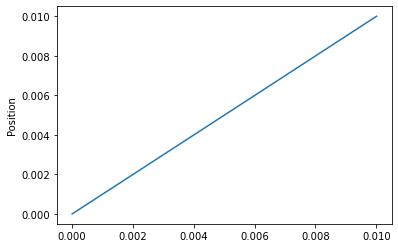

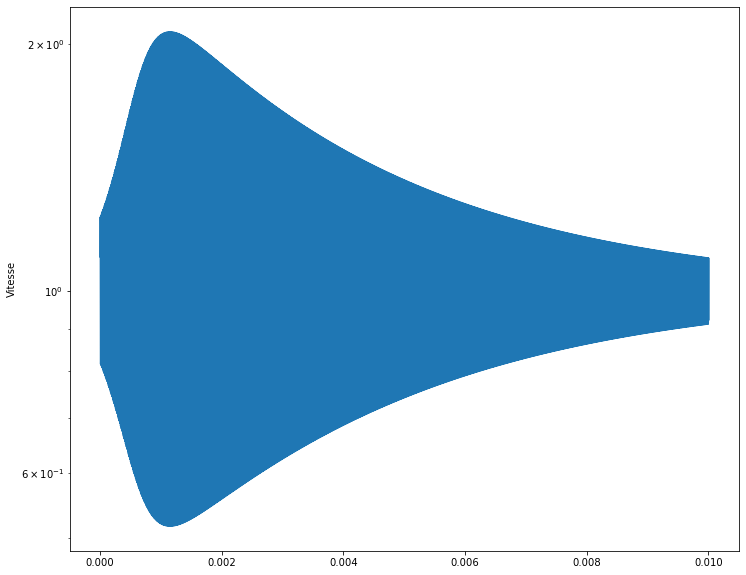

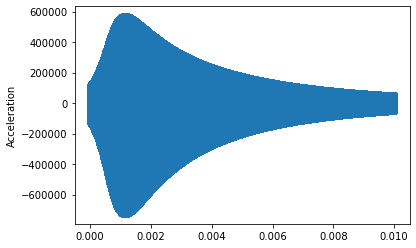

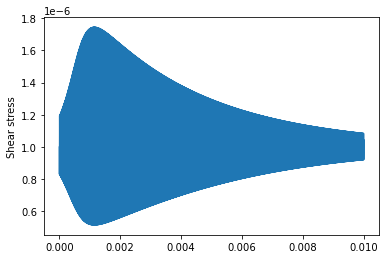

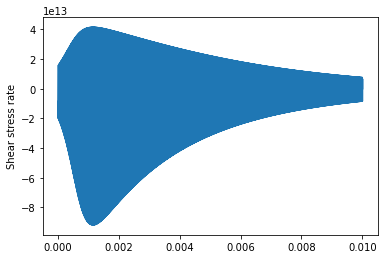

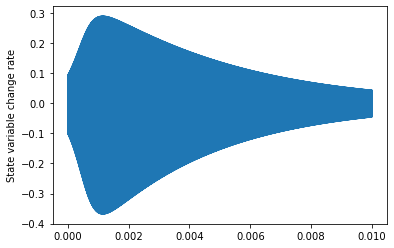

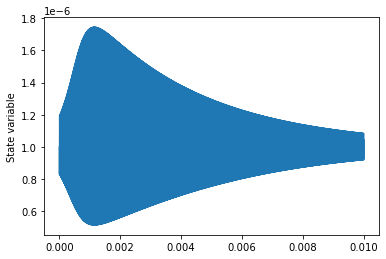

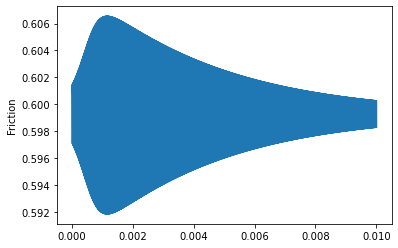

In [274]:
plotspeed=1
plotstart=1
plotend=n_iterations
plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(ulist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Position')  
#plt.yscale('log')

plt.figure(figsize=((12,10)))
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(vlist[i] for i in range(plotstart, plotend, plotspeed)))
#plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(-vlist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Vitesse')
#plt.ylim(1e-8,1e4)
plt.yscale('log')

plt.figure()
plt.scatter(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(vptlist[i] for i in range(plotstart, plotend, plotspeed)))
plt.ylabel('Acceleration')
#plt.yscale('log')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Taulist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Shear stress')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Tauptlist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Shear stress rate')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Thetaptlist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('State variable change rate')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(Thetalist[i] for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('State variable')

plt.figure()
plt.plot(list(t[i] for i in range(plotstart, plotend, plotspeed)),list(f0+a*np.log(vlist[i]/v0)+b*np.log(Thetalist[i]*vlist[i]/Dc) for i in range (plotstart,plotend, plotspeed))) #Plot la force du ressort
plt.ylabel('Friction')
#plt.figure()
#plt.plot(list(times[i] for i in range(plotstart, plotend, plotspeed)),list(f0+a*Philist[i]+b*Thetalist[i] for i in range (plotstart,plotend, plotspeed))) #Plot coefficient de friction 
#plt.ylabel('Friction')

Text(0.5, 0, 'Velocity')

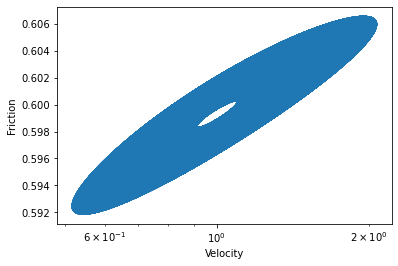

In [275]:
plt.figure()
plt.plot(list(vlist[i] for i in range(1, i-2, 10)),list(f0+a*np.log(vlist[i]/v0)+b*np.log(Thetalist[i]*vlist[i]/Dc) for i in range(1,i-2,10)))
plt.xscale('log')
plt.ylabel('Friction')
plt.xlabel('Velocity')

In [91]:
V0*np.exp(Philist),ulist,Thetalist

(array([[1.00000000e+04],
        [1.73742241e-07],
        [1.73741678e-07],
        ...,
        [1.74094556e-07],
        [1.74094591e-07],
        [1.74094626e-07]]),
 array([[-0.0001],
        [-0.0001],
        [-0.0001],
        ...,
        [-0.0001],
        [-0.0001],
        [-0.0001]]),
 array([[-22.50020466],
        [-22.50014251],
        [-22.50014251],
        ...,
        [-22.50014251],
        [-22.50014251],
        [-22.50014251]]))

In [254]:
times

[0,
 1.5628821893349892e-23,
 9.1743119266055e-08,
 1.8348623853210998e-07,
 2.7522935783705374e-07,
 3.6697247718088637e-07,
 4.5871559656360776e-07,
 5.50458715985218e-07,
 6.422018354457172e-07,
 7.339449549451054e-07,
 8.256880744833826e-07,
 9.174311940605488e-07,
 1.009174313676604e-06,
 1.1009174333315485e-06,
 1.192660553025382e-06,
 1.2844036727581046e-06,
 1.3761467925297166e-06,
 1.4678899123402178e-06,
 1.5596330321896082e-06,
 1.651376152077888e-06,
 1.7431192720050571e-06,
 1.8348623919711157e-06,
 1.9266055119760637e-06,
 2.018348632019901e-06,
 2.1100917521026283e-06,
 2.201834872224245e-06,
 2.2935779923847513e-06,
 2.385321112584147e-06,
 2.477064232822433e-06,
 2.5688073530996083e-06,
 2.660550473415673e-06,
 2.752293593770628e-06,
 2.8440367141644724e-06,
 2.9357798345972067e-06,
 3.0275229550688313e-06,
 3.1192660755793458e-06,
 3.21100919612875e-06,
 3.302752316717044e-06,
 3.3944954373442284e-06,
 3.486238558010303e-06,
 3.5779816787152678e-06,
 3.669724799459122

In [255]:
np.cumsum(ulist[0:10])[-1]

3.6000155190110244e-13

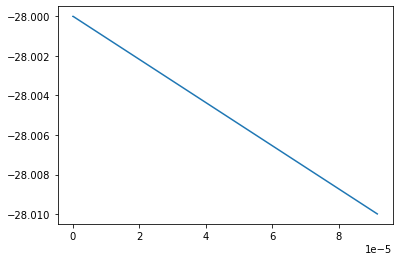

In [256]:
plt.plot(times[0:-1],Thetalist[0:-1])

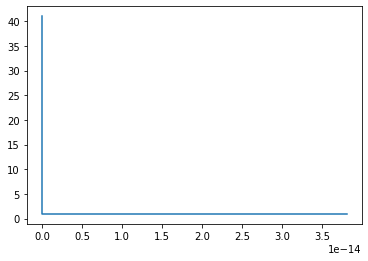

In [193]:
plt.plot(times[0:-1],Philist[0:-1])

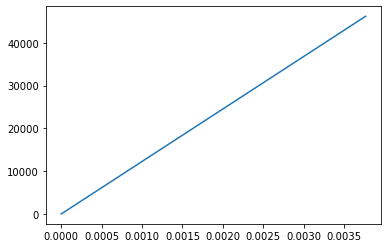

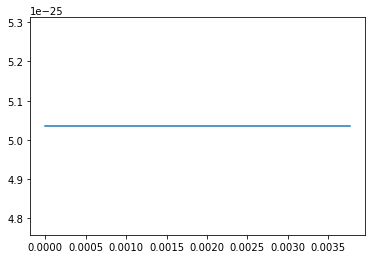

In [177]:
"Spring force components"
plt.figure()
plt.plot(list(times[i] for i in range(1, n_iterations, 10)),list(k*Vplate/V0*times[i] for i in range (1,n_iterations,10))) #Plot le déplacemnt du bloc à l'infini qui tire le ressort
plt.figure()
plt.plot(list(times[i] for i in range(1, n_iterations, 10)),list(k*ulist[i] for i in range (1,n_iterations,10))) #Plot la réduction du de la force du au déplacement du bloc système